# Fundamentals of Descriptive Statistics

This notebook was presented by __Mustafa Ray__ in a workshop in __Magnimind Academy__ on May 18th 2021. 

Basic concepts of descriptive statistics were explained with a presentation in advance in the same workshop.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data generation

In [2]:
# We will have 3 companies, each of which has 1000 employees.
# We will generate random annual incomes for these employees.
# We will generate the data in a way that it will show Gaussian Distribution
# But the copanies will have different means and standard deviations.

np.random.seed(0)    # in order to enable you to see the same results with me, I fixed random seed.

companies = ['Company A','Company B', 'Company C']
employees = 1000       # you can play with this number

mu    = [70,120,150]     # income means for companies (70K, 120K, 150K)
sigma = [15,25,45]    # standard deviations for income distributions (K)

data = [np.random.normal(mu[i], sigma[i], employees) for i in range(len(companies))]

In [3]:
# Pandas can find median without sorting data but I prefer to sort it for exploration.

data = np.sort(data, axis=1)    

data = data.astype(int)   # I convert data into integers using astype but you can use rounding instead.

data

array([[ 24,  27,  28, ..., 108, 110, 111],
       [ 45,  49,  50, ..., 186, 187, 199],
       [  9,  22,  27, ..., 255, 260, 281]])

In [4]:
df = pd.DataFrame(data)
df = df.T                   # The features should be available in columns. So we transpose it.

df.columns=companies       # We set column names in our DataFrame

df.head()        # Lowest salaries in (K). Sorting was ascending.

,Company A,Company B,Company C
0,24,45,9
1,27,49,22
2,28,50,27
3,28,56,33
4,30,56,33


In [5]:
df.tail()       # Highest salaries

,Company A,Company B,Company C
995,106,183,251
996,107,185,252
997,108,186,255
998,110,187,260
999,111,199,281


In [6]:
df.shape      # We must have 1000 rows and 3 columns

(1000, 3)

## Exploratory data analysis for univariate variables

### Histograms

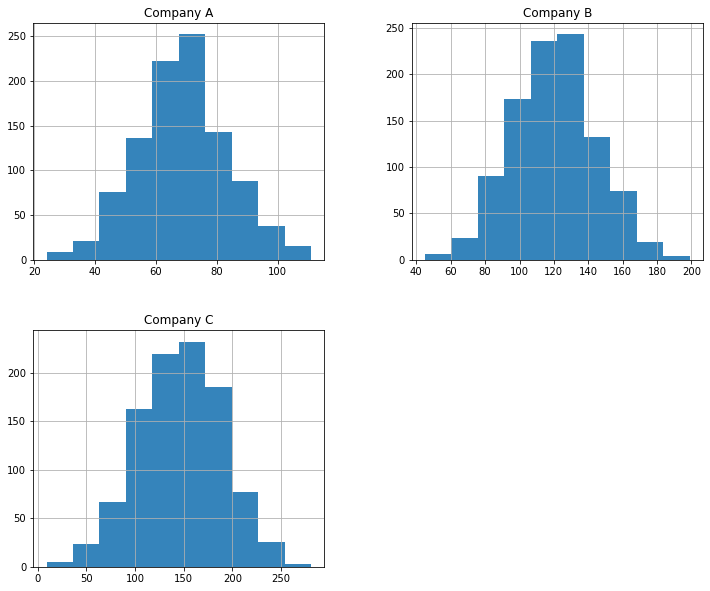

In [7]:
df.hist(figsize=(12,10), alpha=0.9);        #  by using Pandas built-in methods

### Boxplots

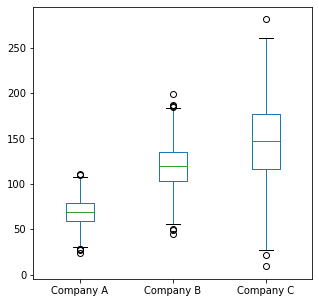

In [8]:
df.plot.box(figsize=(5, 5));                 # by using Pandas built-in methods

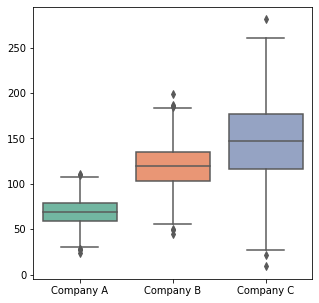

In [9]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(data=df, palette="Set2")    # by using Seaborn Library

##  Measures of Central Tendency

### Mean

In [10]:
company_mean = df.mean().round(1)
print('Means are in (K):\n\n{}'.format(company_mean))

Means are in (K):

Company A     68.8
Company B    119.8
Company C    147.2
dtype: float64


In [11]:
# We can see individual company statistics like df.mean()[0]

print('Mean (Company A): ', df.mean()[0])    #   df['Company A'].mean()   also works

Mean (Company A):  68.823


### Are calculated Means close to intended Means?

In [12]:
# we generate a new dataframe from calculated means
mean_diff = pd.DataFrame(company_mean, columns=['Calculated Mean'])

mean_diff['Intended Mean'] =  mu      # we add mu (the array of intended means) as a new column
mean_diff

,Calculated Mean,Intended Mean
Company A,68.8,70
Company B,119.8,120
Company C,147.2,150


### Median

In [13]:
company_median = df.median()

print('Company medians (K):\n\n{}'.format(company_median)) 

Company medians (K):

Company A     69.0
Company B    120.0
Company C    147.0
dtype: float64


### Mode

In [14]:
df.mode().T   # The most frequent salaries.

,0
Company A,64
Company B,120
Company C,172


### How close are Means and Medians to each other

In [15]:
mean_median = pd.DataFrame( 
    {'MEAN': company_mean, 'MEDIAN': company_median} 
)

mean_median.round(1)

,MEAN,MEDIAN
Company A,68.8,69.0
Company B,119.8,120.0
Company C,147.2,147.0


## Measures of Dispersion

### Max

In [16]:
company_max = df.max()

print('Maximum salaries (K):\n\n{}'.format(company_max))

Maximum salaries (K):

Company A    111
Company B    199
Company C    281
dtype: int64


### Min

In [17]:
company_min = df.min()

print('Minimum salaries (K):\n\n{}'.format(company_min)) 

Minimum salaries (K):

Company A    24
Company B    45
Company C     9
dtype: int64


### Range

In [18]:
range_salaries = company_max - company_min

print('The range between Max and Min salaries (K):\n\n{}'.format(range_salaries));

The range between Max and Min salaries (K):

Company A     87
Company B    154
Company C    272
dtype: int64


In [19]:
# We can check range for individual companies like range_salaries[2]

print('For {} Range is: {}K'.format(companies[2], range_salaries[2]) )

For Company C Range is: 272K


### Quantiles

In [20]:
# We will see %25, %50, %75 percentiles or 1st, 2nd and 3rd quantiles. You can check any percentile.

quantiles = df.quantile([.25, .50, .75])  

print('Quantiles (K):\n\n{}'.format(quantiles.T))

Quantiles (K):

            0.25   0.50    0.75
Company A   59.0   69.0   79.00
Company B  103.0  120.0  135.00
Company C  116.0  147.0  177.25


### Interquantile Range (IQR)

In [21]:
interquantile_range = quantiles.loc[.75] - quantiles.loc[.25]

print('Interquantile Ranges(K) (%75 - %25):\n\n{}'.format(interquantile_range))

Interquantile Ranges(K) (%75 - %25):

Company A    20.00
Company B    32.00
Company C    61.25
dtype: float64


### Is MEDIAN equal to 50'th percentile?

In [22]:
# quantiles.loc[.5] == company_median

print('Whether MEDIAN\'s are equal to 50\'th percentiles\n\n{}'.format(quantiles.loc[.5] == company_median))

Whether MEDIAN's are equal to 50'th percentiles

Company A    True
Company B    True
Company C    True
dtype: bool


### Boxplots again

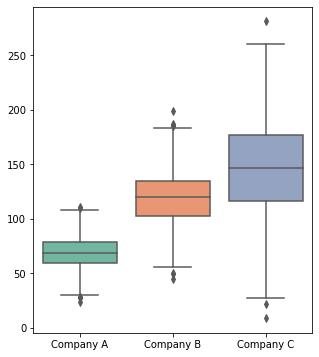

In [23]:
plt.figure(figsize=(5, 6))
ax = sns.boxplot(data=df, palette="Set2")

## Standard deviation and variance

### Variance

In [24]:
var = df.var()      # how dispersed is your data

In [25]:
print('Variances:\n\n{}'.format(var.round(1)))

Variances:

Company A     219.8
Company B     586.9
Company C    1844.3
dtype: float64


You see that income (k) and variance (k^2) do not have the same unit. So it is difficult to understand how dispersed your data are. Look at standard deviation then.

### Standard Deviation

In [26]:
std = df.std()

In [27]:
print('Standard Deviations (K):\n\n{}'.format(std.round(1)))

Standard Deviations (K):

Company A    14.8
Company B    24.2
Company C    42.9
dtype: float64


### Are Standard Deviations (Std) similar to what we intended at the beginning

In [28]:
std = pd.DataFrame(std.round(1), columns=['Standard Deviation'])

In [29]:
std['Sigma'] = sigma                  # sigma is the std we intended at the beginning.
std

,Standard Deviation,Sigma
Company A,14.8,15
Company B,24.2,25
Company C,42.9,45


## Summary Statistics

In [30]:
# You can see all this information in one table.

df.describe().round(1)

,Company A,Company B,Company C
count,1000.0,1000.0,1000.0
mean,68.8,119.8,147.2
std,14.8,24.2,42.9
min,24.0,45.0,9.0
25%,59.0,103.0,116.0
50%,69.0,120.0,147.0
75%,79.0,135.0,177.2
max,111.0,199.0,281.0


In [31]:
df.describe().loc['50%']   # Medians

Company A     69.0
Company B    120.0
Company C    147.0
Name: 50%, dtype: float64

In [32]:
df.describe().loc['max'] - df.describe().loc['min']     # Range can also be calculated this way.

Company A     87.0
Company B    154.0
Company C    272.0
dtype: float64

In [33]:
df.describe().loc['75%'] - df.describe().loc['25%']     # Interquantile range can also be calculated this way.

Company A    20.00
Company B    32.00
Company C    61.25
dtype: float64

### Z Scores

In [34]:
# Z-Scores are used to understand how far individuals are from the mean
# We need to import scipy library to calculate Z-Scores

from scipy import stats

In [35]:
zdf = stats.zscore(df)      # zscore()

In [36]:
zdf = pd.DataFrame(zdf, columns=companies)

In [37]:
zdf.head()    # The lowest Z scores (Z scores of individuals with lowest salaries).

,Company A,Company B,Company C
0,-3.025174,-3.090859,-3.219558
1,-2.822699,-2.925668,-2.916694
2,-2.755208,-2.884370,-2.800208
3,-2.755208,-2.636582,-2.660425
4,-2.620225,-2.636582,-2.660425


In [38]:
zdf.tail()     # The highest Z scores (Z scores of individuals with highest salaries)

,Company A,Company B,Company C
995,2.509134,2.608252,2.418367
996,2.576625,2.690848,2.441664
997,2.644117,2.732146,2.511556
998,2.779100,2.773444,2.628042
999,2.846591,3.269019,3.117283


In [39]:
# Z scores between -1 and 1 (individuals around the mean income)
# These are the individuals in the first standard deviation from mean (plus and minus one std)

zdf[ (zdf >-1) & (zdf < 1) ].dropna(how='all')  # we drop NaN values since Z scores out of -1 and 1 will be NaN

,Company A,Company B,Company C
160,-0.932936,NaN,NaN
161,-0.932936,-0.984666,NaN
162,-0.932936,-0.984666,NaN
163,-0.932936,-0.984666,NaN
164,-0.932936,-0.984666,NaN
...,...,...,...
844,NaN,0.997634,0.997237
845,NaN,0.997634,0.997237
846,NaN,0.997634,NaN
847,NaN,0.997634,NaN


 #### I will try to add new notebooks about interpreting data with Python.
 #### Thank you